<a href="https://colab.research.google.com/github/Ramprabu95/AI_based_image_compression/blob/main/lidar_file_processor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install laspy[laszip]
import laspy
import numpy as np
from mpl_toolkits import mplot3d

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file = "/content/drive/MyDrive/Colab Notebooks/CNI2020_C2_386000_4037000.laz"
laz = laspy.read(file)
las_file = laspy.convert(laz)
las_file.write("/content/drive/MyDrive/Colab Notebooks/trial.las")

In [5]:
#Header format
pointformat = las_file.point_format
for spec in pointformat:
  print(spec)


DimensionInfo(name='X', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)
DimensionInfo(name='Y', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)
DimensionInfo(name='Z', kind=<DimensionKind.SignedInteger: 0>, num_bits=32, num_elements=1, is_standard=True, description='', offsets=None, scales=None)
DimensionInfo(name='intensity', kind=<DimensionKind.UnsignedInteger: 1>, num_bits=16, num_elements=1, is_standard=True, description='', offsets=None, scales=None)
DimensionInfo(name='return_number', kind=<DimensionKind.BitField: 3>, num_bits=4, num_elements=1, is_standard=True, description='', offsets=None, scales=None)
DimensionInfo(name='number_of_returns', kind=<DimensionKind.BitField: 3>, num_bits=4, num_elements=1, is_standard=True, description='', offsets=None, scales=None)
DimensionInfo(name='synthetic', kind=<DimensionKind.BitF

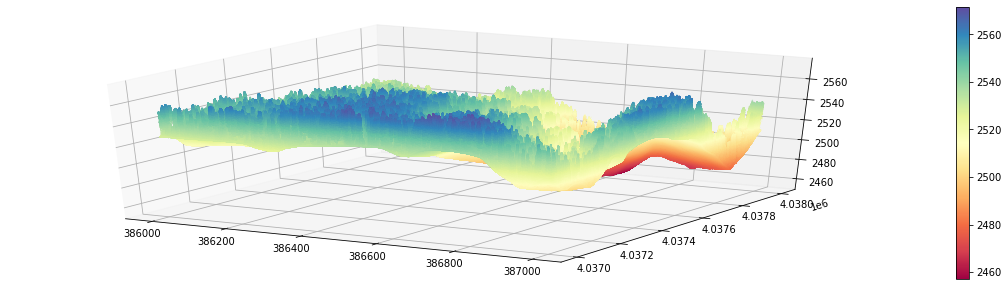

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[20, 5])
ax = plt.axes(projection='3d')
sc = ax.scatter(laz.x, laz.y, laz.z, c=laz.z ,s=0.1, marker='o', cmap="Spectral")
plt.colorbar(sc)
plt.show()

In [8]:
from laspy.file import File
ground = laspy.create(point_format = las_file.header.point_format, file_version = las_file.header.version)
ground.points = las_file.points[las_file.classification == 2]
ground.write("/content/drive/MyDrive/Colab Notebooks/ground.las")


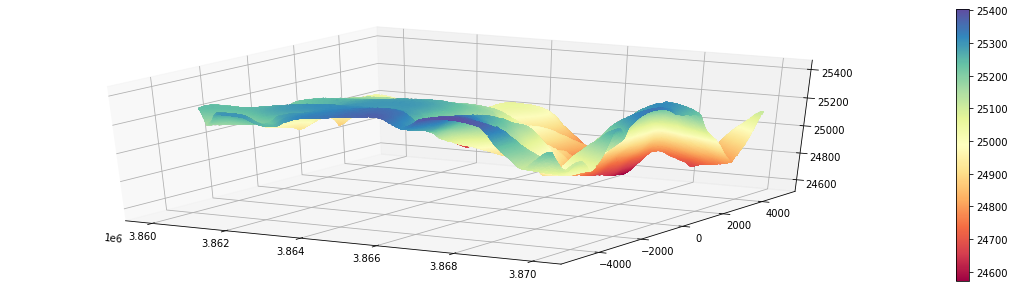

In [9]:
file = "/content/drive/MyDrive/Colab Notebooks/ground.las"
laz = laspy.read(file)
fig = plt.figure(figsize=[20, 5])
ax = plt.axes(projection='3d')
sc = ax.scatter(laz.x, laz.y, laz.z, c=laz.z ,s=0.1, marker='o', cmap="Spectral")
plt.colorbar(sc)
plt.show()

In [ ]:
I = las_file.z > 0
h_plot = 